In [39]:
from google.colab import drive

drive.mount('/content/gdrive')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


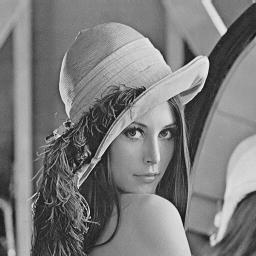

In [40]:
img = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/lena256.jpg')
print(img.shape)
#cv2_imshow(img)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg)

#히스토그램

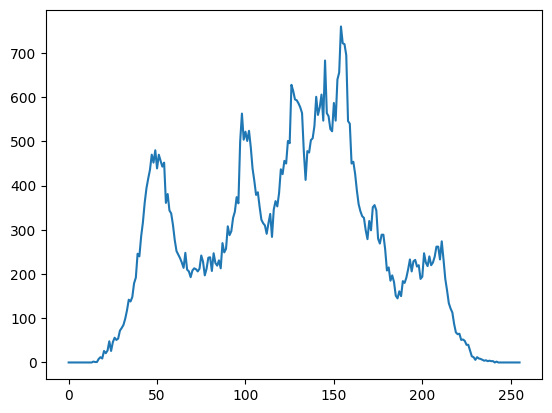

In [41]:
# 정상 출력
hist = cv2.calcHist([gimg], [0], None, [256], [0, 255]) # gimg를 [0] 회색영상이므로 한 개의 채널로, None - 마스크 없이, 256개 빔으로, [0, 255] - 0부터 255까지
plt.plot(hist)

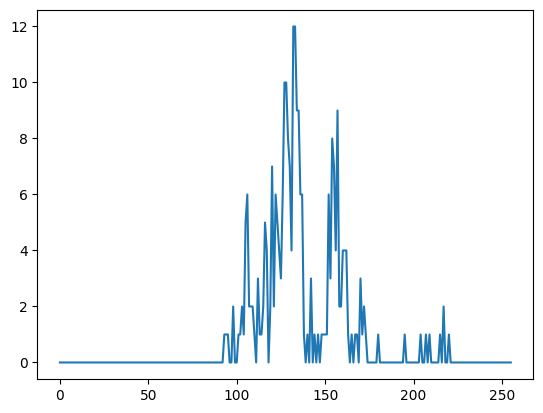

In [42]:
# 비정상 출력, 화소 수가 극히 적음에 유의
hist = cv2.calcHist(gimg, [0], None, [256], [0, 255]) # gimg를 [0] 회색영상이므로 한 개의 채널로, None - 마스크 없이, 256개 빔으로, [0, 255] - 0부터 255까지
plt.plot(hist)

(256, 256, 3)


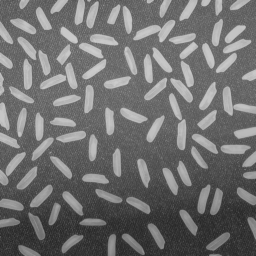

In [43]:
img2 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/rice.bmp')
print(img2.shape)
#cv2_imshow(img2)
RGB_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

gimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg2)

# ???: 공돌이들은 이런거 보면 개수 세고 싶어지지 않나요?

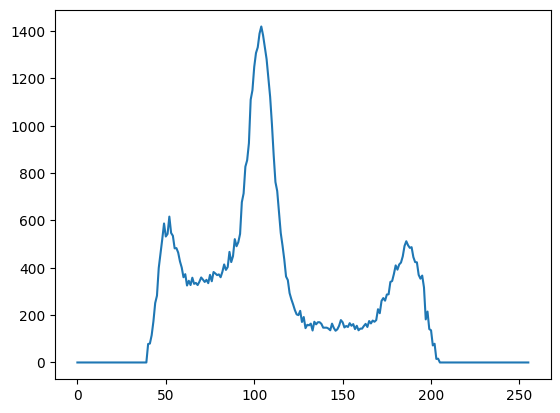

In [44]:
hist_rice = cv2.calcHist([gimg2], [0], None, [256], [0, 255])
plt.plot(hist_rice)

In [45]:
gBin = np.zeros((gimg2.shape[0], gimg2.shape[1])) # 분리하여 이진영상을 나타낼 변수

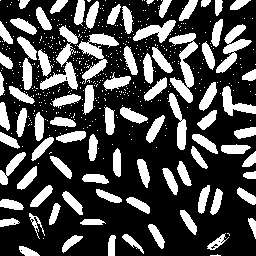

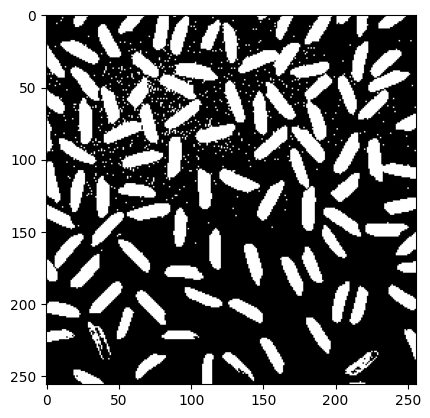

In [46]:
T = 120 # 임계값 threshold 지정

for h in range(gimg2.shape[0]):
    for w in range(gimg2.shape[1]):
        if gimg2[h, w] > T:
            gBin[h, w] = 255
        else:
            gBin[h, w] = 0

cv2_imshow(gBin)
plt.imshow(gBin, cmap='gray')

세포 카운팅

(360, 360, 3)


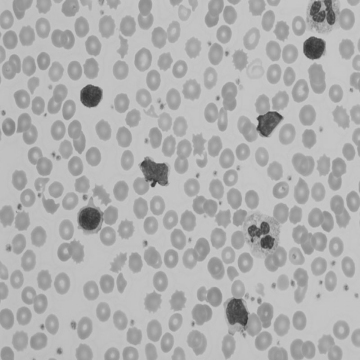

In [47]:
img3 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/cell.bmp')
print(img3.shape)
#cv2_imshow(img3)
RGB_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img3)

gimg3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg3)

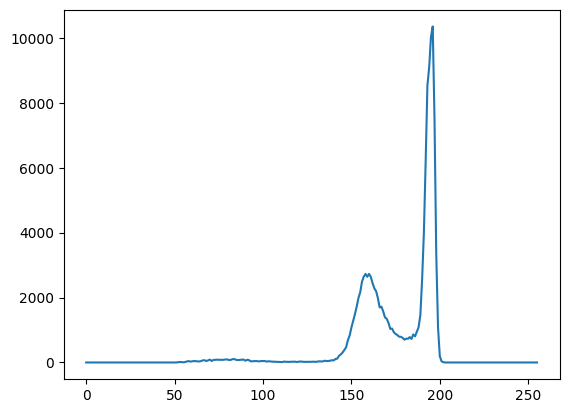

In [48]:
hist_cell = cv2.calcHist([gimg3], [0], None, [256], [0, 255])
plt.plot(hist_cell)

In [49]:
gBin_cell = np.zeros((gimg3.shape[0], gimg3.shape[1])) # 분리하여 이진영상을 나타낼 변수

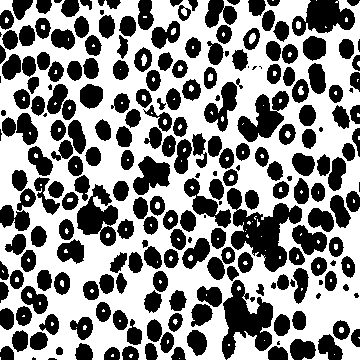

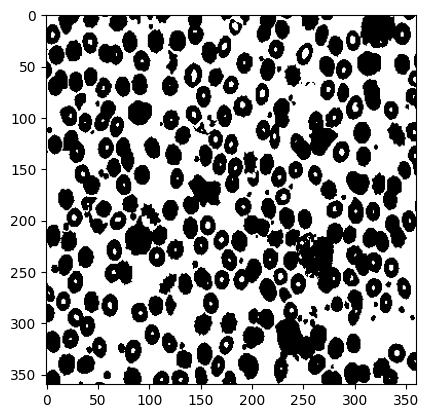

In [50]:
T = 180 # 임계값 threshold 지정

for h in range(gimg3.shape[0]):
    for w in range(gimg3.shape[1]):
        if gimg3[h, w] > T:
            gBin_cell[h, w] = 255
        else:
            gBin_cell[h, w] = 0

cv2_imshow(gBin_cell)
plt.imshow(gBin_cell, cmap='gray')

# 히스토그램
## 조명이 심한 영상의 경우

(360, 360, 3)


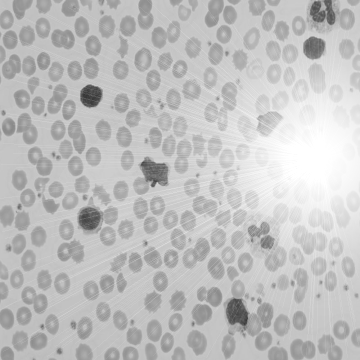

In [51]:
img4 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/cell-bright.bmp')
print(img4.shape)
#cv2_imshow(img4)
RGB_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img4)

gimg4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg4)

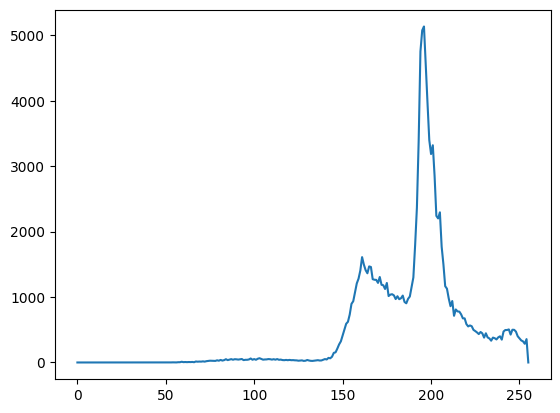

In [52]:
hist_cell_br = cv2.calcHist([gimg4], [0], None, [256], [0, 255])
plt.plot(hist_cell_br)

In [53]:
gBin_cell = np.zeros((gimg3.shape[0], gimg3.shape[1])) # 분리하여 이진영상을 나타낼 변수

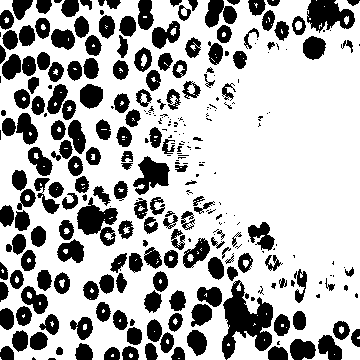

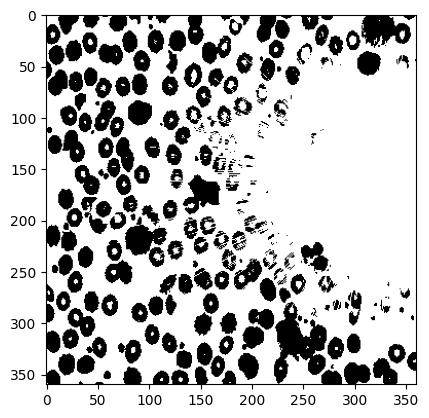

In [54]:
T = 180 # 임계값 threshold 지정

for h in range(gimg4.shape[0]):
    for w in range(gimg4.shape[1]):
        if gimg4[h, w] > T:
            gBin_cell[h, w] = 255
        else:
            gBin_cell[h, w] = 0

cv2_imshow(gBin_cell)
plt.imshow(gBin_cell, cmap='gray')

## 전역 임계값을 이용한 영상 분할

(256, 256, 3)


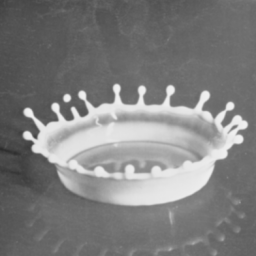

In [55]:
img4 = cv2.imread('/content/gdrive/My Drive/디지털 영상처리 강의 관련/Images/milkdrop.bmp')
print(img4.shape)
#cv2_imshow(img4)
RGB_img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img4)

gimg4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg4)

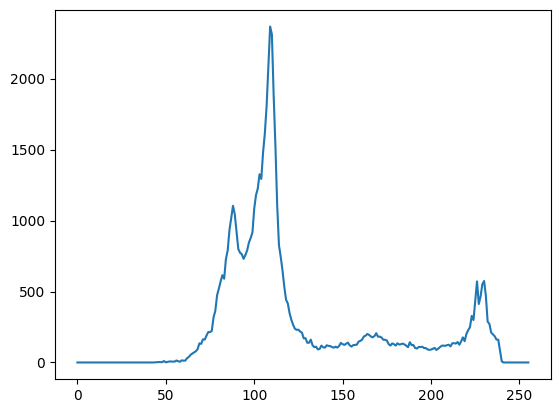

In [56]:
hist_m = cv2.calcHist([gimg4], [0], None, [256], [0, 255])
plt.plot(hist_m)

In [57]:
T1 = 50
T2 = 0
T0 = 1

outimg = np.zeros((gimg4.shape[0], gimg4.shape[1])) # 출력 이미지

In [58]:
#함수 정의 - 각 그룹별 평균값으로 새로운 임계값 계산
def threshold_update(h, w, img, output, T1):
    sum1 = 0
    count1 = 1 # 분모가 0이 되는 것 방지
    sum2 = 0
    count2 = 1

    for h in range(img4.shape[0]):
        for w in range(img4.shape[1]):
            if output[h, w] == 255:
                sum1 = sum1 + img[h, w]
                count1 = count1 + 1
            else:
                sum2 = sum2 + img[h, w]
                count2 = count2 + 1


    avg1 = sum1 / count1 # 평균값 계산
    avg2 = sum2 / count2

    T2 = np.int32(avg1 + avg2) / 2 # 평균값으로 새로운 임계값 계산

    return T2

In [59]:
# 영상에 초기 임계값 적용
for h in range(gimg4.shape[0]):
    for w in range(gimg4.shape[1]):
        if gimg4[h, w] > T1:
            outimg[h, w] = 255
        else:
            outimg[h, w] = 0

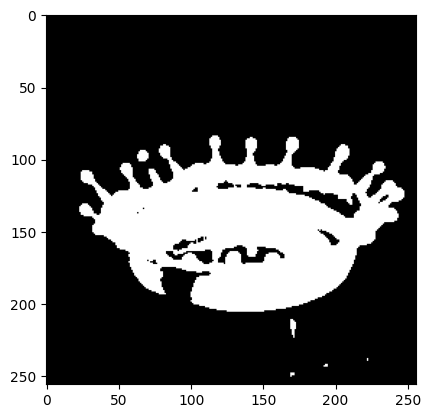

In [60]:
while True:
    T2 = threshold_update(gimg4.shape[0], gimg4.shape[1], gimg4, outimg, T1)

    if(np.abs(T2 - T1) < T0):
        for h in range(gimg4.shape[0]):
            for w in range(gimg4.shape[1]):
                if(gimg4[h, w] > T2):
                    outimg[h, w] = 255
                else:
                    outimg[h, w] = 0
        break # for 루프를 돌린 후 while 루프를 빠져나옴, if 안
    else:
        T1 = T2
        for h in range(gimg4.shape[0]):
            for w in range(gimg4.shape[1]):
                if(gimg4[h, w] > T1):
                    outimg[h, w] = 255
                else:
                    outimg[h, w] = 0


plt.imshow(outimg, cmap='gray')

In [61]:
print(T1, T2)

152.0 152.5
